[View in Colaboratory](https://colab.research.google.com/github/venabled/machine-learning-tutorial/blob/master/ImageNet_Inference_Example.ipynb)

In [0]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Input
from keras.losses import categorical_crossentropy
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau
import keras.utils
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import cv2
from keras.applications.imagenet_utils import decode_predictions


In [22]:
!wget https://i.imgur.com/ytjRi7W.png

--2018-08-16 17:54:00--  https://i.imgur.com/ytjRi7W.png
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84924 (83K) [image/png]
Saving to: ‘ytjRi7W.png.1’

ytjRi7W.png.1       100%[===================>]  82.93K  --.-KB/s    in 0.02s   

2018-08-16 17:54:00 (4.96 MB/s) - ‘ytjRi7W.png.1’ saved [84924/84924]



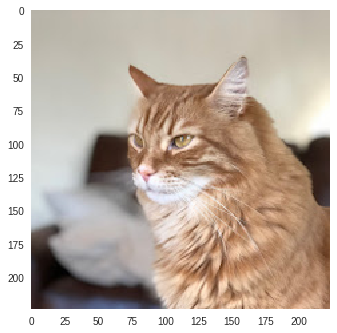

In [37]:
egburt = cv2.imread('./ytjRi7W.png', cv2.IMREAD_UNCHANGED)
egburt = cv2.cvtColor(egburt, cv2.COLOR_BGR2RGB)
egburt.shape
plt.imshow(egburt)
plt.grid(False)

In [24]:
input_tensor = Input(shape=(224, 224, 3))  # this assumes K.image_data_format() == 'channels_last'
model = InceptionV3(input_tensor=input_tensor, include_top=True, weights='imagenet')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_103 (BatchN (None, 111, 111, 32) 96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 111, 111, 32) 0           batch_normalization_103[0][0]    
__________________________________________________________________________________________________
conv2d_104

In [38]:
x = preprocess_input(egburt.astype(np.float32).reshape(1, 224, 224, 3))
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n02123045', 'tabby', 0.87692815), ('n02123159', 'tiger_cat', 0.07980742), ('n02127052', 'lynx', 0.01775772), ('n03958227', 'plastic_bag', 0.010346868), ('n02124075', 'Egyptian_cat', 0.0041537373)]]
